In [ ]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2022-05-27 18:24:21--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2022-05-27 18:24:21 (141 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [ ]:
import json 

#load the JSON file 
with open('./sarcasm.json', 'r') as f:
  datastore = json.load(f)


#Initialize the lists 
sentences = []
labels = []

#Collect sentences and labels into the lists 
for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

##Hyperparameters

In [ ]:
#Number of examples for training 
training_size = 20000

#Vocabulary size of the tokenizer 
vocab_size = 10000

#Maximum length of the padded sequence 
max_length = 32

#Output dimensions of the embedding layer 
embedding_dim = 16

##Split the dataset

Generate the train and test datasets

Use the `training_size` value you set above to slice the `sentences` and `labels` lists into two sublists: one for training and. another for testing 

In [ ]:
#Split the sentences 
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

#Split the labels 
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

##Pre-processing the train and test sets

Preprocess the text and labels so it can be consumed by the model 

Use the `Tokenizer` class to create the vocabulary and the `pad_sequences` mehtod to generate padded token sequences 

Also set the labels to a numpy array so it can be a valid data type for training the model using `model.fit()`

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

#Parameters for padding and OOV tokens 
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

#Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
87;l78787,787k
#Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

#Generate and pad the training sequences 
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

#Generate and pad the training sequences 
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

#Convert the labels lists into numpy arrays 
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

##Build and compile the model 

The architecture is similar except that a `GlobalAveragePooling1D` layer instead of `Flatten` layer will be used after the `Embedding` layer. 

This adds the task of averageing over the sequence dimension before connecting to the dense layers

See a short demo of how this works using the snippet of code below 

In [ ]:
import tensorflow as tf

# Initialize a GlobalAveragePooling1D (GAP1D) layer
gap1d_layer = tf.keras.layers.GlobalAveragePooling1D()

# Define sample array
sample_array = np.array([[[10,2],[1,3],[1,1]]])

# Print shape and contents of sample array
print(f'shape of sample_array = {sample_array.shape}')
print(f'sample array: {sample_array}')

# Pass the sample array to the GAP1D layer
output = gap1d_layer(sample_array)

# Print shape and contents of the GAP1D output array
print(f'output shape of gap1d_layer: {output.shape}')
print(f'output array of gap1d_layer: {output.numpy()}')

shape of sample_array = (1, 3, 2)
sample array: [[[10  2]
  [ 1  3]
  [ 1  1]]]
output shape of gap1d_layer: (1, 2)
output array of gap1d_layer: [[4 2]]


This added computation reduces the dimensionality of the model as compared to using `Flatten()` and thus, the number of training parameters will also decrease. 

See the output of model.summary() belwo and see how it compares if you swap out the pooling layer with a simple `Flatten()`

In [ ]:
#Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])


model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 32, 16)            160000    
                                                                 
 global_average_pooling1d_2   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 24)                408       
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compile the model 
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


##Train the model 

Feed the prepared datasets to train the model 

In [ ]:
num_epochs = 30

#Train the model
history = model.fit(training_padded, training_labels, epochs = num_epochs, validation_data = (testing_padded, testing_labels), verbose = 2
                    
                    )





Epoch 1/30
625/625 - 4s - loss: 0.5610 - accuracy: 0.7229 - val_loss: 0.4044 - val_accuracy: 0.8219 - 4s/epoch - 6ms/step
Epoch 2/30
625/625 - 2s - loss: 0.3172 - accuracy: 0.8719 - val_loss: 0.3460 - val_accuracy: 0.8447 - 2s/epoch - 4ms/step
Epoch 3/30
625/625 - 3s - loss: 0.2383 - accuracy: 0.9052 - val_loss: 0.3416 - val_accuracy: 0.8556 - 3s/epoch - 4ms/step
Epoch 4/30
625/625 - 3s - loss: 0.1936 - accuracy: 0.9269 - val_loss: 0.3595 - val_accuracy: 0.8480 - 3s/epoch - 4ms/step
Epoch 5/30
625/625 - 3s - loss: 0.1611 - accuracy: 0.9409 - val_loss: 0.3847 - val_accuracy: 0.8514 - 3s/epoch - 4ms/step
Epoch 6/30
625/625 - 3s - loss: 0.1365 - accuracy: 0.9512 - val_loss: 0.4056 - val_accuracy: 0.8493 - 3s/epoch - 5ms/step
Epoch 7/30
625/625 - 3s - loss: 0.1189 - accuracy: 0.9604 - val_loss: 0.4389 - val_accuracy: 0.8416 - 3s/epoch - 4ms/step
Epoch 8/30
625/625 - 3s - loss: 0.1023 - accuracy: 0.9667 - val_loss: 0.4713 - val_accuracy: 0.8395 - 3s/epoch - 4ms/step
Epoch 9/30
625/625 - 3s 

##Visualize the data

Use the cell below to plot the training results 

You may notice some overfitting but that is because the validation accuracy is slowly dropping while training accuracy going up 

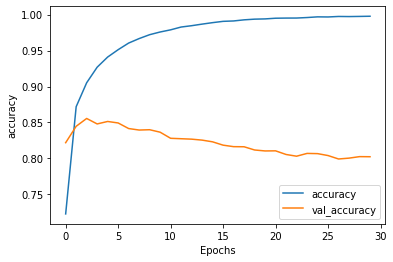

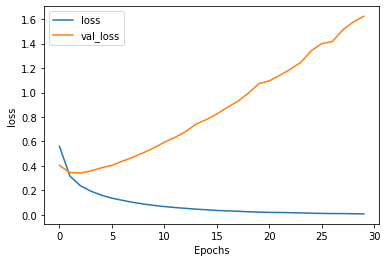

In [ ]:
import matplotlib.pyplot as plt

#Plot utility
def plot_graphs(histoy, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

##Visualize word embeddings 

Pull files to run in TensorFlow Embedding Projector 

In [ ]:
#Get the index-word dicitonary
reverse_word_index = tokenizer.index_word

#Get the embedding layer from the model 
embedding_layer = model.layers[0]

#Get the weights of the embedding layer 
embedding_weights = embedding_layer.get_weights()[0]

#Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape)

(10000, 16)


In [ ]:
import io

#Open writeable file 
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

#Initialize the loop. Start counting at `1` since `0` is just for the padding 
for word_num in range(1, vocab_size):
  #Get the word associated at the current index
  word_name = reverse_word_index[word_num]

  #Get the embedding weights associated with the current index
  word_embedding = embedding_weights[word_num]

  #Write the word name 
  out_m.write(word_name + "\n")

  #Write the word embedding 
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

#Close the files 
out_v.close()
out_m.close()





In [ ]:
#Import file utilites into Colab

try:
  from google.colab import files
except ImportError:
  pass

#Download files 
else:
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>